In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
%matplotlib inline
import seaborn as sns

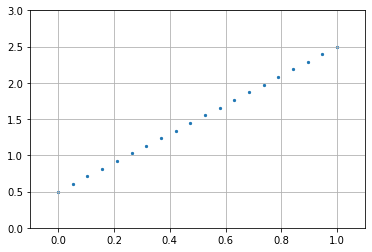

In [20]:
x = np.linspace(0, 1, 20)
m = 2
c = 0.5
y = m * x + c
plt.scatter(x, y, s=5)
plt.axis([-0.1, 1.1, 0, 3])
plt.grid()

In [21]:
lr = LinearRegression()#estimator
lr.fit(x.reshape(-1, 1), y)

LinearRegression()

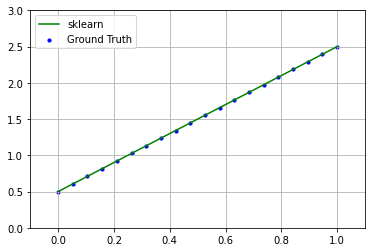

In [22]:
yhat = lr.predict(x.reshape(-1, 1))
plt.scatter(x, y, s=10, c='b', label='Ground Truth')
plt.plot(x, yhat, 'g-', label='sklearn')
plt.axis([-0.1, 1.1, 0, 3])
plt.legend()
plt.grid()

In [23]:
lr.coef_ #for finding slope(m)
#_(underscore is important) is a scikit lib convention

array([2.])

In [24]:
lr.intercept_ #for finding intercept(c)  

0.5000000000000003

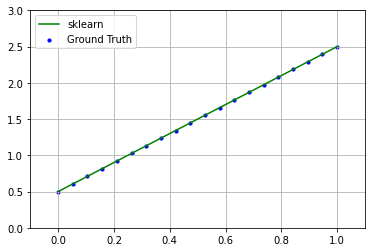

In [25]:
yhat = np.dot(x.reshape(-1, 1), lr.coef_) + lr.intercept_

plt.scatter(x, y, s=10, c='b', label='Ground Truth')
plt.plot(x, yhat, 'g-', label='sklearn')
plt.axis([-0.1, 1.1, 0, 3])
plt.legend()
plt.grid()

## **Exercise**: Pick a random slope and intercept; and draw a line. Find the correct slope and intercept with sklearn.

In [26]:
# enter code here
m = 13
c= 1.34
x = np.linspace(0,1,100)
y = m*x+c
lr =LinearRegression()
lr.fit (x.reshape(-1,1),y)
lr.coef_
lr.intercept_

1.3400000000000007

# Multiple Regression with sklearn

In [27]:
# The dataset used in the demonstration comes loaded with the scikit learn library, and to use it, 
# you need first to import the sklearn datasets. 
# Using .load_boston(), you can directly load the data set necessary for our demonstration.
# Importing pandas
import pandas as pd

# Importing inbuilt datasets 
from sklearn import datasets as data

# Using .load_boston() to load the dataset
boston = data.load_boston()

# Creating a dataframe out of the loaded dataset
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['value'] = boston.target
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  value  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [11]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [28]:
y = boston.target
X = boston.data
lr.fit(X, y)

LinearRegression()

In [29]:
yhat = lr.predict(X)

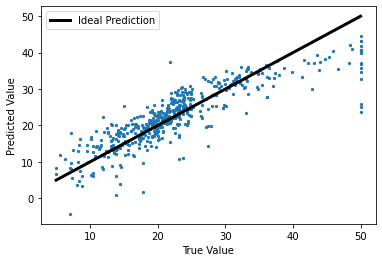

In [30]:
plt.scatter(y, yhat, s=5)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k', linewidth=3, label='Ideal Prediction')
plt.legend()

In [15]:
# Assume you are building a linear model using the Boston housing dataset to predict the price of a house given number of rooms 
from sklearn import datasets as data
from sklearn.linear_model import LinearRegression
import pandas as pd
boston = data.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
lr = LinearRegression()
df['value'] = boston.target
X_train = df['RM'].values
y_train = df['value'].values
lr.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

## Measuring Error

In [31]:
mean_squared_error(y, yhat)#y is the actual value ,yhat is the predication value

21.894831181729202

In [32]:
r2_score(y, yhat)

0.7406426641094095

## Importance of individual features

<AxesSubplot:>

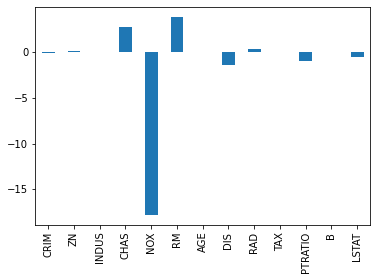

In [33]:
f_imp = pd.Series(lr.coef_, index=boston.feature_names)
f_imp.plot(kind='bar')

In [34]:
f_imp

CRIM       -0.108011
ZN          0.046420
INDUS       0.020559
CHAS        2.686734
NOX       -17.766611
RM          3.809865
AGE         0.000692
DIS        -1.475567
RAD         0.306049
TAX        -0.012335
PTRATIO    -0.952747
B           0.009312
LSTAT      -0.524758
dtype: float64

## Exercise: How do we interpret this?

In [35]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

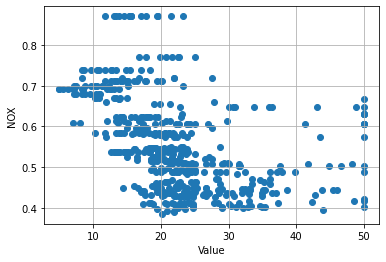

In [36]:
plt.scatter(y, df['NOX'].values)
plt.xlabel('Value')
plt.ylabel('NOX')
plt.grid()

In [37]:
nox = df['NOX'].values
y = df['value'].values
lr.fit(nox.reshape(-1, 1), y)
yhat = lr.predict(nox.reshape(-1, 1))

r2_score(y, yhat)

0.182603042501699

In [38]:
# identify the r2 score by using NOX and CHAS variables as your predictor variables and value as outcome variable
from sklearn import datasets as data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
boston = data.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['value'] = boston.target
collist = ['NOX', 'CHAS']
X= df[collist].values
y = df['value'].values
lr  = LinearRegression()
lr.fit(X, y)
yhat = lr.predict(X)
r2_score(y, yhat)

0.22888379517392654

In [39]:
lr.coef_

array([-35.47982729,   7.82242764])

<AxesSubplot:xlabel='CHAS', ylabel='value'>

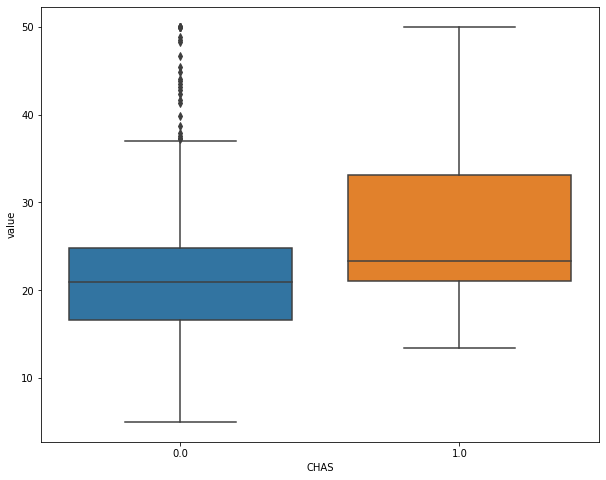

In [44]:
fig, ax= plt.subplots(figsize=(10,8))
sns.boxplot(x = 'CHAS', y='value', data = df,ax=ax)

C:\Users\BHARGAVRAMBANDI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


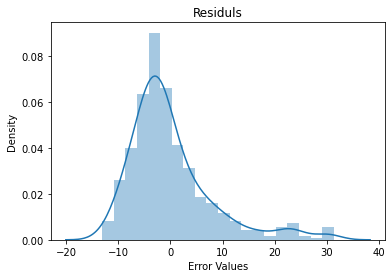

In [46]:
#plot the histogram
ax=sns.distplot(y-yhat,bins = 20)
ax.set_title('Residuls')
_=plt.xlabel('Error Values')

## Cumumlative feature variances

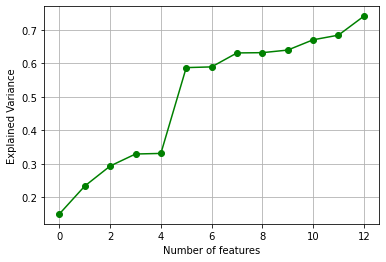

In [47]:
y = boston.target
X = boston.data
variances = []
for i in range(X.shape[1]):
    xx = X[:, :(i + 1)]
    lr.fit(xx, y)
    variances.append(explained_variance_score(y, lr.predict(X[:, :(i + 1)])))

plt.plot(variances, 'go-')
plt.xlabel('Number of features')
plt.ylabel('Explained Variance')
plt.grid()

## **Exercise**
### Use the Diabetes dataset (provided below) to fit a linear regression model.
### Rank the features in order of _decreasing_ importance.

In [48]:
diabetest = data.load_diabetes()

In [54]:
print(diabetest.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [62]:
df = pd.DataFrame(diabetest.data,columns = diabetest.feature_names)
df['y'] = diabetest.target
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6      y  
0 -0.002592  0.019908 -0.017646  151.0  
1 -0.039493 -0.068330 -0.092204   75.0  
2 -0.002592  0.002864 -0.025930  141.0  
3  0.034309  0.022692 -0.009362  206.0  
4 -0.002592 -0.031991 -0.046641  135.0

In [63]:
X = diabetest.data
y = diabetest.target
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [64]:
lr.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

<AxesSubplot:>

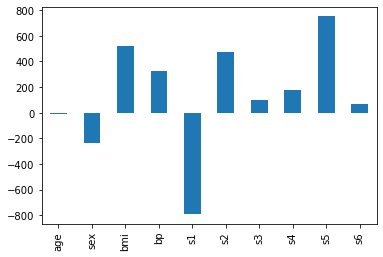

In [65]:
features = pd.Series(lr.coef_,diabetest.feature_names)
features.plot(kind = 'bar')

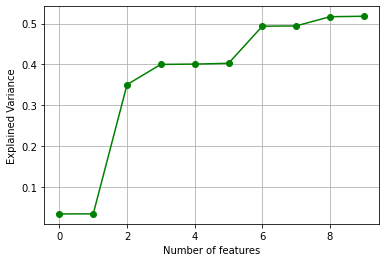

In [60]:
# enter code here
#Ranking the features inorder of increasing importance
y = diabetest.target
X = diabetest.data
variances = []
for i in range(X.shape[1]):
    xx = X[:, :(i + 1)]
    lr.fit(xx, y)
    variances.append(explained_variance_score(y, lr.predict(X[:, :(i + 1)])))

plt.plot(variances, 'go-')
plt.xlabel('Number of features')
plt.ylabel('Explained Variance')
plt.grid()

<AxesSubplot:>

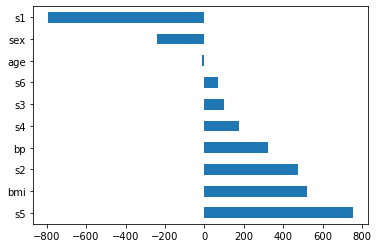

In [66]:
# Ranking the features in order of decreasing importance.
features.sort_values(ascending = False,inplace=True)
features.plot(kind='barh')